# Introduction

There are two types of heirarchical clustering, Agglomerative and Divisiv.

## Agglomerative

Agglomerative starts from the individual datapoints themselves, and works bottom-up. Each data point is treated as its own cluster, and then gradually converges with other clusters to form even larger clusters.


### Algorithm in English

1. Start with `k` number of clusters, where `k` is the number of data points in the dataset.
2. Join two data points by selecting the two points that are the closest together; resulting in `k-1` datapoints
3. Repeat 2 until there are only one cluster left. Note that a point that has been clustered together can become treated as a new point that is the centroid of all the points that are within its cluster. Also note that there are differways of defining distance such as Manhattan or most popularly, Euclidean.
4. Partition that clusters by thresholding on the resulting dendrogram. More information on this later.


### Example 1

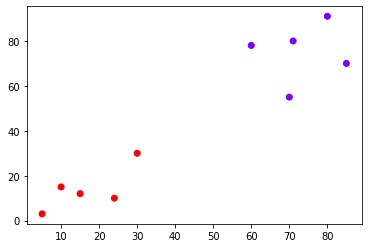

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering


X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])


cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

The respective dendrogram looks like the following:

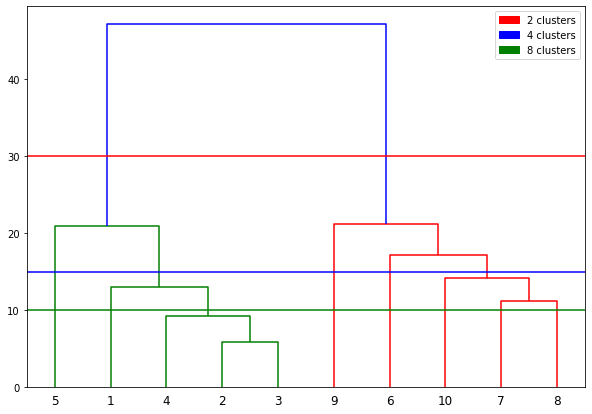

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches


linked = linkage(X, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=range(1, 11),
            distance_sort='descending',
            show_leaf_counts=True)
plt.axhline(y=30, color='r', linestyle='-')
plt.axhline(y=15, color='b', linestyle='-')
plt.axhline(y=10, color='g', linestyle='-')
l1 = mpatches.Patch(color='red', label='2 clusters')
l2 = mpatches.Patch(color='blue', label='4 clusters')
l3 = mpatches.Patch(color='green', label='8 clusters')
plt.legend(handles=[l1, l2, l3])
plt.show()

In the dendrogram:
* The y-axis represents the euclidean distance between points. For example, points 2 and 3 are aboout 8 units apart, and 7 and 8 are about 12 units appart. Addiitonally, clusters (2,3) and 4 are about 3 units appart.
* The x-axis are the datapoints themselves.

Within the dendrogram, we can see that with a single analysis on the data, identify the new clusters without having to retrain. The horizontal lines are manually put in place to demonstrate how we use thresholds to determine the clustering label. In effect these lines represent the minimumal distance required between clusters in order to be identified as a cluster. So naturally, the larger the distance is, the more smaller clusters we eliminate because their distances are too close to one another. And vise-versa, the larger the distance is, the more clusters we can classify because the constrain allows for many, more smaller distances. In effect, the clusters at the very bottom have a definitional constraint of zero and hence are techniqually their own cluster.

For example, if our goal is to classify the datapoints into 2 clusters, we can algorithmically select any threshold between 21 and 45ish.

### Example 2

Here, we will demonstrate how you can supply a precomputed or preprocessed affinity matrix as the input. This is useful when we already have a graph structure, and would like to identify clusters within this graph. In this case, we defined the similiarity matrix as the euclidean distances between points.

Text(0.5, 1.0, 'Moons, AgglomerativeClustering Results')

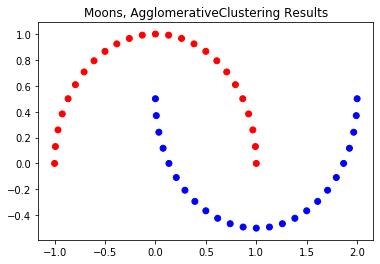

In [13]:
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances


X, y = make_moons(n_samples=50, shuffle=True, noise=None, random_state=None)
euclid_matrix = pairwise_distances(X)

# notice: affinity='precomputed'
cluster = AgglomerativeClustering(affinity='precomputed', linkage='single')
cluster.fit(euclid_matrix)

colors = ['r' if _y==1 else 'b' for _y in cluster.labels_]
plt.scatter(X[:,0], X[:,1], c=colors)
plt.title("Moons, AgglomerativeClustering Results")

In [17]:
import pandas as pd

pd.DataFrame(euclid_matrix)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,1.000000,2.816028,2.116706,1.124945,1.608726,0.130806,2.443517,1.586707,0.517638,...,0.968348,1.111140,0.884577,1.732051,0.390181,1.793745,1.739491,1.503680,0.130806,1.662939
1,1.000000,0.000000,2.229166,1.871496,1.026121,1.496759,1.111140,2.071943,0.765367,0.517638,...,0.768108,0.130806,0.130806,1.000000,1.318692,1.111140,1.600754,0.642879,0.884577,0.884577
2,2.816028,2.229166,0.000000,1.000000,1.732051,1.414214,2.843754,0.642879,1.486648,2.598842,...,1.847759,2.117085,2.334090,1.233376,2.866025,1.118034,1.318692,1.617413,2.777427,1.357605
3,2.116706,1.871496,1.000000,0.000000,1.000000,0.517638,2.107290,0.390181,1.351233,2.064189,...,1.217523,1.802776,1.932243,1.127854,2.061553,1.008935,0.390181,1.454656,2.117085,1.242133
4,1.124945,1.026121,1.732051,1.000000,0.000000,0.517638,1.129942,1.318692,0.924571,1.086769,...,0.261052,1.008935,1.042737,0.897425,1.133975,0.886509,0.642879,0.940199,1.118034,0.910209
5,1.608726,1.496759,1.414214,0.517638,0.517638,0.000000,1.593540,0.884577,1.164469,1.604217,...,0.765367,1.454656,1.532938,1.017971,1.544012,0.940199,0.130806,1.232051,1.617413,1.092935
6,0.130806,1.111140,2.843754,2.107290,1.129942,1.593540,0.000000,2.445821,1.662939,0.642879,...,1.000156,1.217523,1.000000,1.793745,0.261052,1.847759,1.724162,1.586707,0.261052,1.732051
7,2.443517,2.071943,0.642879,0.390181,1.318692,0.884577,2.445821,0.000000,1.442432,2.333990,...,1.503680,1.984753,2.150835,1.188973,2.420094,1.058531,0.765367,1.563005,2.431100,1.317397
8,1.586707,0.765367,1.486648,1.351233,0.924571,1.164469,1.662939,1.442432,0.000000,1.217523,...,0.796969,0.642879,0.884577,0.261052,1.793745,0.390181,1.217263,0.130806,1.503680,0.130806
9,0.517638,0.517638,2.598842,2.064189,1.086769,1.604217,0.642879,2.333990,1.217523,0.000000,...,0.847427,0.642879,0.390181,1.414214,0.884577,1.503680,1.727693,1.111140,0.390181,1.318692




## Divisiv

Divisiv works top down and begins by treating all the points as a single cluster, and progressively breaks them down into smaller and smaller clusters.
